In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
train_directory='/content/gdrive/MyDrive/dataset_skin_cancer/train'
test_directory='/content/gdrive/MyDrive/dataset_skin_cancer/test'
val_directory='/content/gdrive/MyDrive/dataset_skin_cancer/data'

In [7]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 1s 0us/step


In [8]:
  # useful for getting number of classes
folders = glob('/content/gdrive/MyDrive/dataset_skin_cancer/train/*')  # ager error ajay to is ko dkhna hai  # '/*'
len(folders)

2

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 22 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [13]:
print(len(training_set))
print(len(test_set))

1
1


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
1/1 [==============================] - 33s 33s/step - loss: 0.6682 - accuracy: 0.5455 - val_loss: 1.0750 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 24s 24s/step - loss: 1.0156 - accuracy: 0.5000 - val_loss: 0.6709 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 22s 22s/step - loss: 0.5843 - accuracy: 0.5455 - val_loss: 0.8750 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 22s 22s/step - loss: 0.7303 - accuracy: 0.5000 - val_loss: 0.5228 - val_accuracy: 0.7273
Epoch 5/5
1/1 [==============================] - 22s 22s/step - loss: 0.4050 - accuracy: 0.8636 - val_loss: 0.4238 - val_accuracy: 0.8182


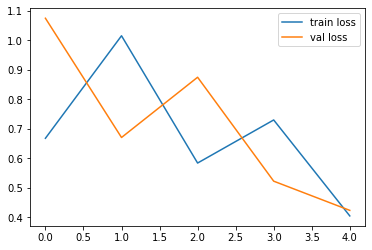

In [15]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

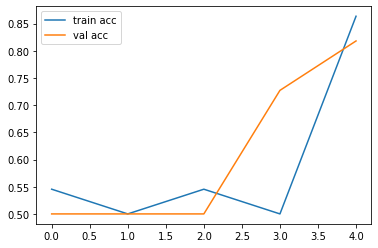

In [23]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [24]:
model.save('Skin_cancer_BC.h5')

In [25]:
from keras.models import load_model
# from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import load_img, img_to_array


model1 = load_model('./Skin_cancer_BC.h5',compile=False)  

In [26]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [27]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 1s 830ms/step


'benign'

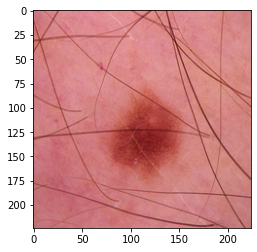

In [28]:
img='/content/gdrive/MyDrive/dataset_skin_cancer/test/benign/18.jpg'
pic=load_img( img ,target_size=(224,224,3))
plt.imshow(pic)
output(img)
# Guava ok
# Mango ok
# Strawberry ok
# Guava missing
# orange missing


In [ ]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)
# 2.9.2  ya version rkhny hain
# 2.9.0 ya version rkny hain